In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

AAPL = pd.read_csv("/Users/boragoksal/PycharmProjects/FinDataAnalysis/data/raw/AAPL.csv")
GOOGL= pd.read_csv("/Users/boragoksal/PycharmProjects/FinDataAnalysis/data/raw/GOOGL.csv")
MSFT = pd.read_csv("/Users/boragoksal/PycharmProjects/FinDataAnalysis/data/raw/MSFT.csv")
NFLX = pd.read_csv("/Users/boragoksal/PycharmProjects/FinDataAnalysis/data/raw/NFLX.csv")

In [11]:
AAPL['Date'] = pd.to_datetime(AAPL['Date'])
GOOGL['Date'] = pd.to_datetime(GOOGL['Date'])
MSFT['Date'] = pd.to_datetime(MSFT['Date'])
NFLX['Date'] = pd.to_datetime(NFLX['Date'])

In [12]:
AAPL.describe()

,Adj Close,Close,High,Low,Open,Volume
count,1759.000000,1759.000000,1759.000000,1759.000000,1759.000000,1.759000e+03
mean,122.254891,124.132733,125.365671,122.759315,124.007604,1.002148e+08
std,59.260025,58.820557,59.288977,58.257247,58.746596,5.521072e+07
min,33.952545,35.547501,36.430000,35.500000,35.994999,2.323470e+07
25%,54.304974,56.761250,57.256248,56.434999,56.897499,6.311420e+07
50%,132.000671,134.509995,135.990005,133.320007,134.789993,8.678120e+07
75%,169.405006,170.810005,172.629997,169.404999,170.940002,1.214833e+08
max,259.019989,259.019989,260.100006,257.630005,258.190002,4.265100e+08


In [13]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1759 entries, 0 to 1758
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype              
---  ------     --------------  -----              
 0   Date       1759 non-null   datetime64[ns, UTC]
 1   Adj Close  1759 non-null   float64            
 2   Close      1759 non-null   float64            
 3   High       1759 non-null   float64            
 4   Low        1759 non-null   float64            
 5   Open       1759 non-null   float64            
 6   Volume     1759 non-null   int64              
dtypes: datetime64[ns, UTC](1), float64(5), int64(1)
memory usage: 96.3 KB


In [14]:
def company_subplot(x,y):
    
    plt.figure(figsize = (15,10))
    plt.subplots_adjust(top=2.25, bottom = 1.2) 

    companys = [AAPL,GOOGL,MSFT,NFLX]
    company_names = ["APPLE","GOOGLE", "MICROSOFT", "NETFLIX"]
    colours = ['blue', 'orange', 'green', 'red']

    for i, company in enumerate(companys, 1):
        plt.subplot(2,2,i)
        plt.plot(company[x], company[y], color = colours[i-1])
        plt.ylabel(f'{y}')
        plt.xlabel(None)
       
        if y == 'Volume':
            plt.title(f"Sales {y} for {company_names[i-1]}")
        elif y in ['Adj Close', 'High', 'Low', 'Open', 'Close']:
            plt.title(f"{y} price for {company_names[i-1]}")
            
    plt.tight_layout()

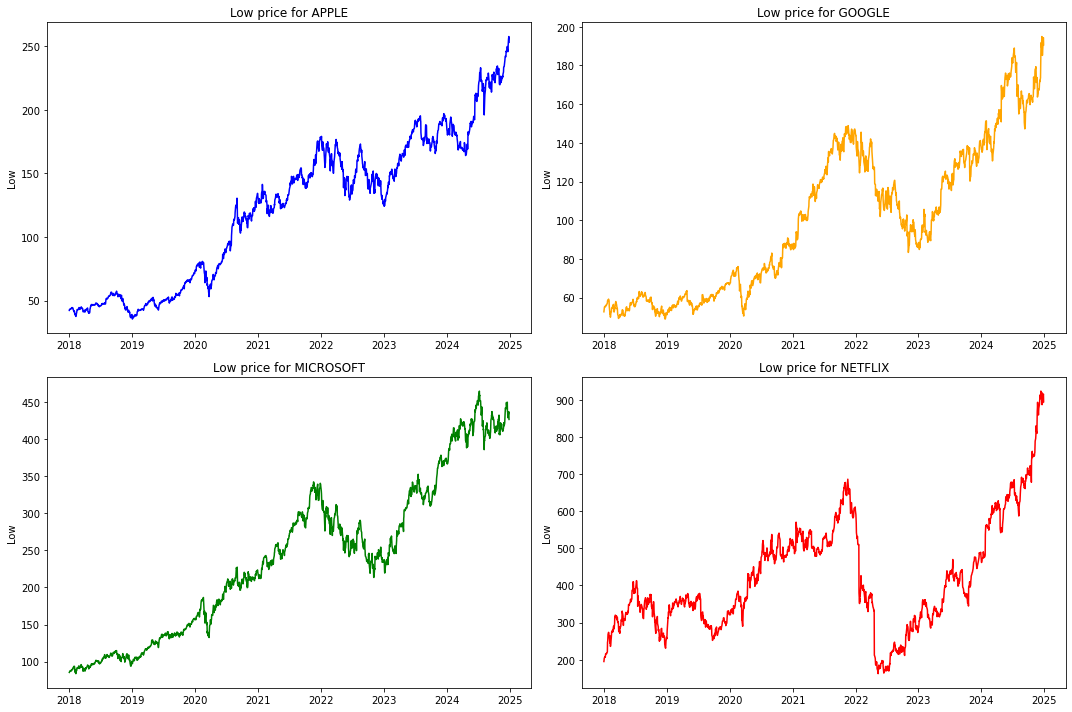

In [15]:
company_subplot('Date','Low')

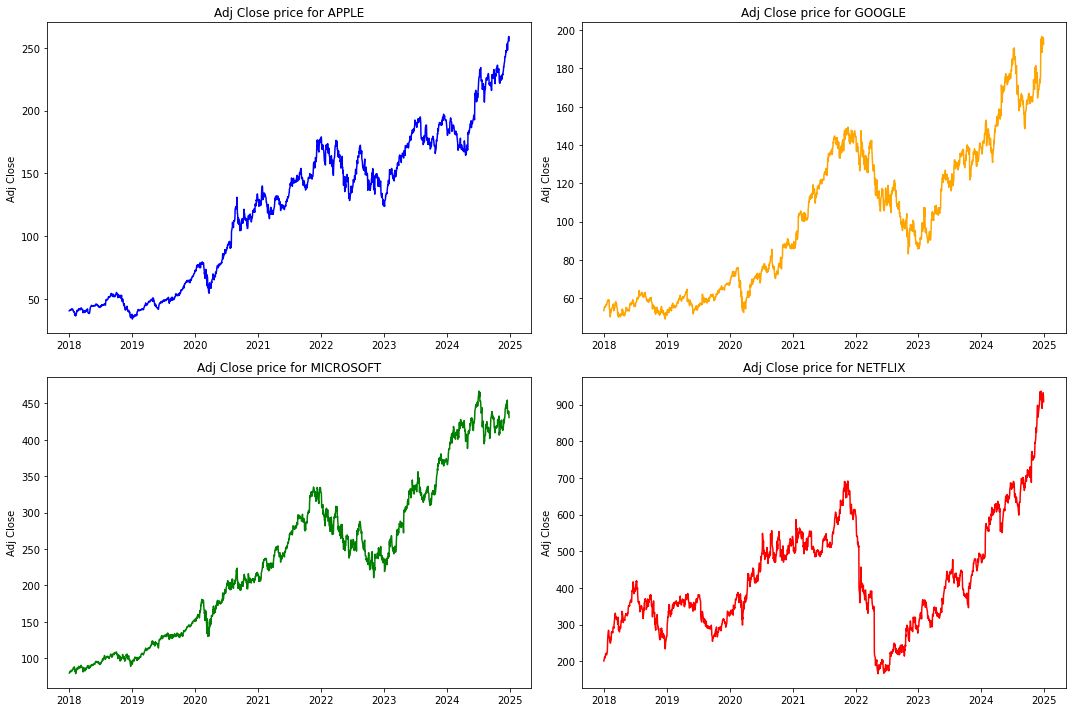

In [16]:
company_subplot('Date','Adj Close')